Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [78]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [79]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [80]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path('gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [81]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2247
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [82]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [83]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# Setting the batch size as 32.
# Image size is set to Image Height Vs Image Width (32X32)
# This is a training set so subset is set as Training

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, 
     color_mode='rgb', batch_size=32, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2,   subset="training"
)

Found 2247 files belonging to 9 classes.
Using 1798 files for training.


In [84]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo


# Setting the batch size as 32.
# Image size is set to Image Height Vs Image Width (32X32)
# This is a training set so subset is set as Validation

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train, 
     color_mode='rgb', batch_size=32, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2,   subset="validation"
)

Found 2247 files belonging to 9 classes.
Using 449 files for validation.


In [85]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Initial set of classes and status
{'actinic keratosis': False, 'basal cell carcinoma': False, 'dermatofibroma': False, 'melanoma': False, 'nevus': False, 'pigmented benign keratosis': False, 'seborrheic keratosis': False, 'squamous cell carcinoma': False, 'vascular lesion': False}
Whether an image from a class is printed or not
{'actinic keratosis': True, 'basal cell carcinoma': True, 'dermatofibroma': True, 'melanoma': True, 'nevus': True, 'pigmented benign keratosis': True, 'seborrheic keratosis': True, 'squamous cell carcinoma': True, 'vascular lesion': True}


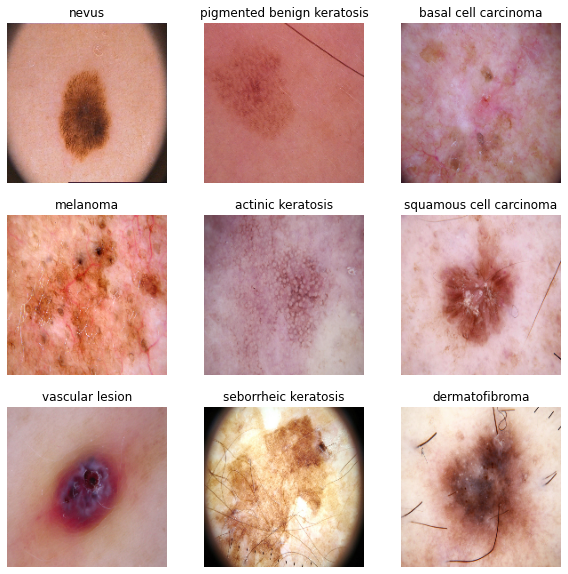

In [86]:
import matplotlib.pyplot as pyplot

class_map = {}


# Setting the overall map as False.
# The class names are stored in a map and the value is set to false.
for class_name in class_names:
  class_map[class_name] = False

print("Initial set of classes and status")
print(class_map)
total_class = len(class_names)
i = 0

# iterate the images and print the one image on each class label


pyplot.figure(figsize=(10, 10))
for images, labels in train_ds:
  if (class_map[class_names[labels[i]]] == False):
    ax = pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(images[i].numpy().astype("uint8"))
    class_map[class_names[labels[i]]] = True
    pyplot.title(class_names[labels[i]])
    pyplot.axis("off")
    i = i + 1
    if (i == total_class):
      break

print("Whether an image from a class is printed or not")
print(class_map)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [87]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [88]:
### Your code goes here

# From https://docs.w3cub.com/tensorflow~2.3/keras/layers/experimental/preprocessing/rescaling
# To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

#
#normalise_pixel_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
#normalized_training_set = train_ds.map(lambda x, y: (normalise_pixel_layer(x), y))
#training_image_batch,training_labels_batch = next(iter(normalized_training_set))

######

# From https://docs.w3cub.com/tensorflow~2.3/keras/layers/experimental/preprocessing/rescaling
# To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model = Sequential()

# From https://docs.w3cub.com/tensorflow~2.3/keras/layers/experimental/preprocessing/rescaling
# To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.


model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the data before sending to fully connected network
model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# The final number of classes is 9
model.add(Dense(9))
model.add(Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [89]:
### Todo, choose an appropirate optimiser and loss function

# Optimiser:  Adam -> It is an adaptive learning algorithm that is designed specifically for training neural networks
# Loss : Sparse Categorical Cross Entropy --> Computes the cross entropy loss between labels and predictions

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [90]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_36 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 activation_37 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                      

### Train the model

In [91]:
# Training the model with 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 11s 66ms/step - loss: 2.0397 - accuracy: 0.2392 - val_loss: 1.8624 - val_accuracy: 0.3207
Epoch 2/20
57/57 [==============================] - 2s 37ms/step - loss: 1.8268 - accuracy: 0.3348 - val_loss: 1.8276 - val_accuracy: 0.2829
Epoch 3/20
57/57 [==============================] - 2s 37ms/step - loss: 1.5966 - accuracy: 0.4416 - val_loss: 1.6467 - val_accuracy: 0.3920
Epoch 4/20
57/57 [==============================] - 2s 37ms/step - loss: 1.4677 - accuracy: 0.4900 - val_loss: 1.3741 - val_accuracy: 0.5056
Epoch 5/20
57/57 [==============================] - 2s 37ms/step - loss: 1.3456 - accuracy: 0.5189 - val_loss: 1.5107 - val_accuracy: 0.4788
Epoch 6/20
57/57 [==============================] - 2s 37ms/step - loss: 1.2723 - accuracy: 0.5567 - val_loss: 1.4488 - val_accuracy: 0.4566
Epoch 7/20
57/57 [==============================] - 2s 37ms/step - loss: 1.2344 - accuracy: 0.5617 - val_loss: 1.4214 - val_accuracy: 0.5100
Epoch 8/20
57/57 [=====

### Visualizing training results

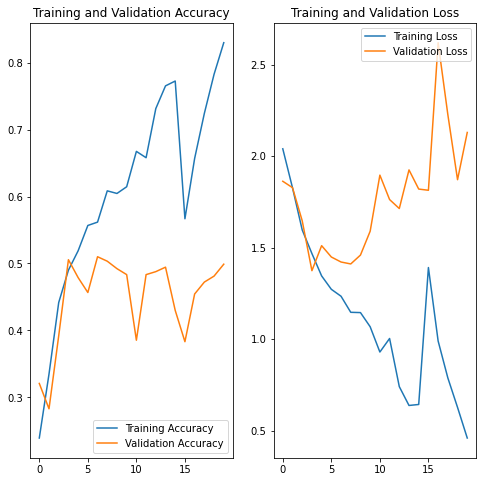

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



The model overfits. The training accuracy is more than 85% and the validation accuracy is 50%. We will try to overcome the same by using different agumentation strategy

### Write your findings here

In [93]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

augumentation_strategy = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

Initial set of classes and status
{'actinic keratosis': False, 'basal cell carcinoma': False, 'dermatofibroma': False, 'melanoma': False, 'nevus': False, 'pigmented benign keratosis': False, 'seborrheic keratosis': False, 'squamous cell carcinoma': False, 'vascular lesion': False}
Whether an image from a class is printed or not
{'actinic keratosis': True, 'basal cell carcinoma': True, 'dermatofibroma': True, 'melanoma': True, 'nevus': True, 'pigmented benign keratosis': True, 'seborrheic keratosis': True, 'squamous cell carcinoma': True, 'vascular lesion': True}


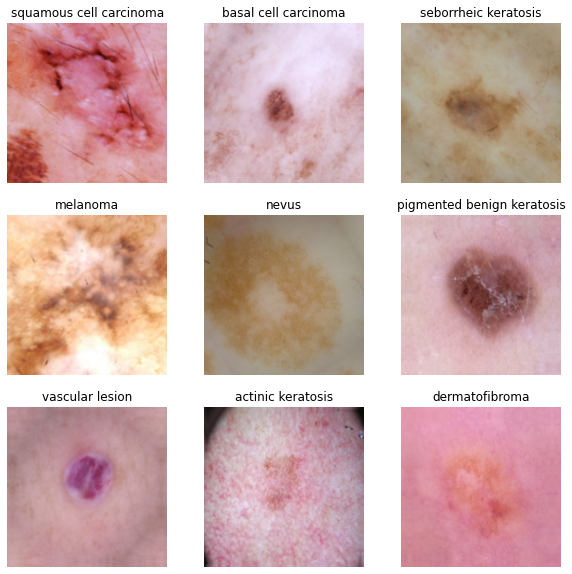

In [94]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

class_map = {}

for class_name in class_names:
  class_map[class_name] = False

print("Initial set of classes and status")
print(class_map)
total_class = len(class_names)
i = 0

pyplot.figure(figsize=(10, 10))
for images, labels in train_ds:
  if (class_map[class_names[labels[i]]] == False):
    au_images = augumentation_strategy(images)
    ax = pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(au_images[i].numpy().astype("uint8"))
    class_map[class_names[labels[i]]] = True
    pyplot.title(class_names[labels[i]])
    pyplot.axis("off")
    i = i + 1
    if (i == 9):
      break

print("Whether an image from a class is printed or not")
print(class_map)





### Todo:
### Create the model, compile and train the model


In [95]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# Created a new model based on the augumentation nstragey above.
model = augumentation_strategy
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))






### Compiling the model

In [96]:
## Your code goes here

## Using the adam optimizer and cross entropy as explained above.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [97]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 3s 43ms/step - loss: 2.1322 - accuracy: 0.2186 - val_loss: 1.8861 - val_accuracy: 0.2806
Epoch 2/20
57/57 [==============================] - 2s 41ms/step - loss: 1.8455 - accuracy: 0.3298 - val_loss: 1.9739 - val_accuracy: 0.2339
Epoch 3/20
57/57 [==============================] - 2s 40ms/step - loss: 1.8053 - accuracy: 0.3621 - val_loss: 1.6405 - val_accuracy: 0.4388
Epoch 4/20
57/57 [==============================] - 2s 41ms/step - loss: 1.7109 - accuracy: 0.3943 - val_loss: 1.6643 - val_accuracy: 0.3942
Epoch 5/20
57/57 [==============================] - 2s 41ms/step - loss: 1.6628 - accuracy: 0.4149 - val_loss: 1.6379 - val_accuracy: 0.3831
Epoch 6/20
57/57 [==============================] - 2s 41ms/step - loss: 1.6146 - accuracy: 0.4444 - val_loss: 1.5420 - val_accuracy: 0.4566
Epoch 7/20
57/57 [==============================] - 2s 41ms/step - loss: 1.5605 - accuracy: 0.4594 - val_loss: 1.4634 - val_accuracy: 0.4677
Epoch 8/20
57/57 [======

### Visualizing the results

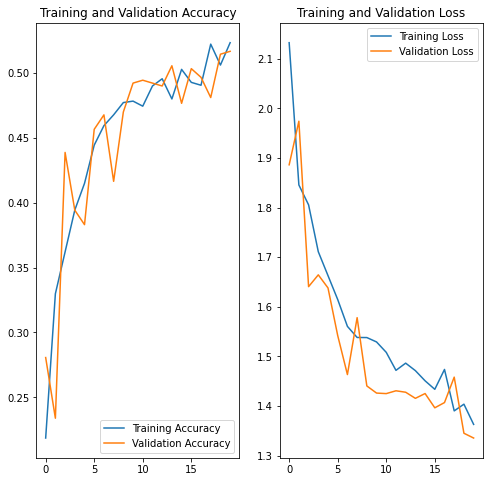

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Answer:**

The training accuracy is very low. It cannot be used to predict such an important disease like cancer.

There is some improvement when compared to previous model. Not much difference between training and test models
*italicized text*


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [99]:
## Your code goes here.
cancer_class_type_count = {}

for name in class_names:
    cancer_class_type_count[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

print("Cancer Class Type" , cancer_class_type_count)

print("--------------------")

total = 0

for key, val in cancer_class_type_count.items():
  total = total + val

print("Total Number of Images ", total)


print("--------------------")

print("Percentage of Images in every class ")

print("--------------------")


for key, val in cancer_class_type_count.items():
  print(" Class Name ", key , " Percentage ", (val/total) * 100)




Cancer Class Type {'actinic keratosis': 120, 'basal cell carcinoma': 378, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
--------------------
Total Number of Images  2247
--------------------
Percentage of Images in every class 
--------------------
 Class Name  actinic keratosis  Percentage  5.34045393858478
 Class Name  basal cell carcinoma  Percentage  16.822429906542055
 Class Name  dermatofibroma  Percentage  4.227859368046285
 Class Name  melanoma  Percentage  19.492656875834445
 Class Name  nevus  Percentage  15.887850467289718
 Class Name  pigmented benign keratosis  Percentage  20.5607476635514
 Class Name  seborrheic keratosis  Percentage  3.4267912772585665
 Class Name  squamous cell carcinoma  Percentage  8.05518469069871
 Class Name  vascular lesion  Percentage  6.186025812194036


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


**Answer:**

(-) seborrheic keratosis has the least number of samples. it has 77 samples and 
it is around 3.4% of the overall samples.

(-) pigmented benign keratosis has 20% of samples and 462 samples.




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [100]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [101]:
print(train_path)
path_to_training_dataset=train_path+"/"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 120 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BE44F750>: 100%|██████████| 500/500 [00:09<00:00, 54.08 Samples/s]


Initialised with 378 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BF2635D0>: 100%|██████████| 500/500 [00:09<00:00, 51.56 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BF149A90>: 100%|██████████| 500/500 [00:10<00:00, 49.14 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F28BF20A850>: 100%|██████████| 500/500 [00:52<00:00,  9.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x671 at 0x7F28BE24A350>: 100%|██████████| 500/500 [00:38<00:00, 12.94 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BE215650>: 100%|██████████| 500/500 [00:09<00:00, 53.78 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F28BF72C750>: 100%|██████████| 500/500 [00:20<00:00, 24.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BF6943D0>: 100%|██████████| 500/500 [00:09<00:00, 55.14 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F28BE17A990>: 100%|██████████| 500/500 [00:08<00:00, 55.59 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [102]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [103]:

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0:5]

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029967.jpg_48e56f45-02da-4b4e-8dfe-51a8b7547b71.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033675.jpg_d0dd812d-aaf0-4828-94b2-1c2612272188.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033780.jpg_adc8508b-f535-4a6b-889f-ff7121fe91d8.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033005.jpg_87a97a92-065b-4601-b6eb-5bc93e5be80d.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027044.jpg_7aee12eb-6160-442c-a8f4-fb8de8a8bb90.jpg']

In [104]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:5]

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma']

In [105]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [106]:
### Iterating the folder names and output folder and computing the count of original image and the agumented image.


grand_total = 0
for i in class_names:
    # POinting the directory where original images are present.
    org_class_directory = pathlib.Path(path_to_training_dataset+i+'/')
    # Pointing to the output directory where the agumented dataset is present
    imb_class_directory = pathlib.Path(path_to_training_dataset+i+'/output/')
    # Finding the length of the original images
    org_length=len(list(org_class_directory.glob('*.jpg')))
     # Finding the length of the agumented images
    imb_length=len(list(imb_class_directory.glob('*.jpg')))
    # Find the total number of images inside a class
    total_length=org_length+imb_length
    # Adding the total number of images across classes
    grand_total=grand_total+total_length
    print(i, " " , total_length)
print("Total ", grand_total)

actinic keratosis   620
basal cell carcinoma   878
dermatofibroma   595
melanoma   938
nevus   857
pigmented benign keratosis   962
seborrheic keratosis   577
squamous cell carcinoma   681
vascular lesion   639
Total  6747


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [107]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [108]:
# Preparing Training Dataset all the images with the agumented and the original images

data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6747 files belonging to 9 classes.
Using 5398 files for training.


#### **Todo:** Create a validation dataset

In [109]:
# Preparing Validation  Dataset all the images with the agumented and the original images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6747 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [110]:
## your code goes here
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [111]:
## your code goes here

# Compiling the model with adam optimiser and cross categorical entropy.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [112]:
epochs = 30

# Fitting the model with 30 epochs for both train and validatioon ds.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 20s 109ms/step - loss: 2.2212 - accuracy: 0.1349 - val_loss: 2.1890 - val_accuracy: 0.1408
Epoch 2/30
169/169 [==============================] - 19s 108ms/step - loss: 2.1819 - accuracy: 0.1388 - val_loss: 2.1864 - val_accuracy: 0.1408
Epoch 3/30
169/169 [==============================] - 19s 109ms/step - loss: 2.1324 - accuracy: 0.1714 - val_loss: 2.0651 - val_accuracy: 0.1913
Epoch 4/30
169/169 [==============================] - 19s 110ms/step - loss: 1.9619 - accuracy: 0.2425 - val_loss: 1.8607 - val_accuracy: 0.2750
Epoch 5/30
169/169 [==============================] - 19s 110ms/step - loss: 1.8123 - accuracy: 0.2999 - val_loss: 1.8391 - val_accuracy: 0.2706
Epoch 6/30
169/169 [==============================] - 19s 111ms/step - loss: 1.7221 - accuracy: 0.3220 - val_loss: 1.6294 - val_accuracy: 0.3440
Epoch 7/30
169/169 [==============================] - 19s 109ms/step - loss: 1.6514 - accuracy: 0.3575 - val_loss: 1.5620 - val_accuracy: 0.3

#### **Todo:**  Visualize the model results

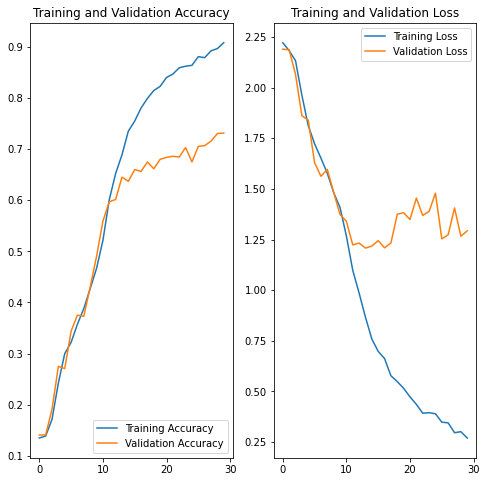

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance has not helped fully. 

There are some benefits of doing the same.
The Training accuracy is around 95% and the validation accuracy is 75%.
It is much better than the previous models we have generated without handlign class rebalance.

The model still overfits